# DataBetes – Baseline

2023-05-31 – Caique Lima

## Libraries

In [ ]:
# !pip install dython

In [1]:
import pandas as pd 
import missingno as msno
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 250)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from IPython.display import Image, display

import dython
from dython.nominal import associations

import graphviz


from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

## Importing data

In [ ]:
file_path = 'drive/My Drive/databetes/data/processed/df_tratado.csv'

df = pd.read_csv(file_path)
df

,chave,replica,ano,cidade,região,sexo,idade (anos),faixa etária (anos),grau escolaridade,pressão alta,bebida alcoólica,freq alcool,exercício físico,cor,peso (kg),altura (cm),imc,classe imc,freq horta,freq refrigerante,moradores,fumante,posse plano saúde,idade início diabetes,diabetes
0,1,1,2015,Aracajú,Nordeste,masculino,59,55 a 64,1º grau ou fundamental ou supletivo de 1º grau,não,não,NaN,não,branca,76.0,172.0,25.7,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,3,não,não,NaN,não
1,2,1,2015,Aracajú,Nordeste,feminino,20,18 a 24,2º grau ou colégio ou técnico ou normal ou cie...,sim,não,NaN,não,parda,84.0,162.0,32.0,obesidade classe I,5 a 6 dias por semana,1 a 2 dias por semana,7,não,não,NaN,não
2,4,1,2015,Aracajú,Nordeste,feminino,32,25 a 34,"pós-graduação (especialização, mestrado, douto...",não,não,NaN,sim,preta,45.0,160.0,17.6,baixo peso,3 a 4 dias por semana,quase nunca,2,não,"sim, apenas um",NaN,não
3,5,1,2015,Aracajú,Nordeste,feminino,70,65+,2º grau ou colégio ou técnico ou normal ou cie...,sim,sim,1 a 2 dias por semana,sim,parda,62.0,153.0,26.5,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,2,não,"sim, apenas um",NaN,não
4,7,1,2015,Curitiba,Sul,feminino,84,65+,curso primário,sim,não,NaN,não,branca,51.0,140.0,26.0,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,1,não,"sim, apenas um",84.0,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235425,72213241096,33,2021,São Paulo,Sudeste,feminino,72,65+,3º grau ou curso superior,não,não,NaN,não,parda,44.0,153.0,18.8,adequado ou eutrófico,quase nunca,nunca,2,não,não,NaN,não
235426,45314403046,26,2021,Belo Horizonte,Sudeste,feminino,67,65+,"pós-graduação (especialização, mestrado, douto...",sim,sim,1 a 2 dias por semana,não,parda,64.0,156.0,26.3,sobrepeso,todos os dias (inclusive sábado e domingo),quase nunca,6,não,"sim, mais de um",NaN,não
235427,26374242025,4,2021,Vitória,Sudeste,feminino,75,65+,3º grau ou curso superior,não,sim,menos de 1 dia por semana,não,parda,60.0,147.0,27.8,sobrepeso,todos os dias (inclusive sábado e domingo),quase nunca,4,não,"sim, apenas um",NaN,não
235428,22312495026,36,2021,Porto Alegre,Sul,feminino,77,65+,"pós-graduação (especialização, mestrado, douto...",sim,não,NaN,não,preta,58.0,162.0,22.1,adequado ou eutrófico,todos os dias (inclusive sábado e domingo),nunca,1,não,não,NaN,não


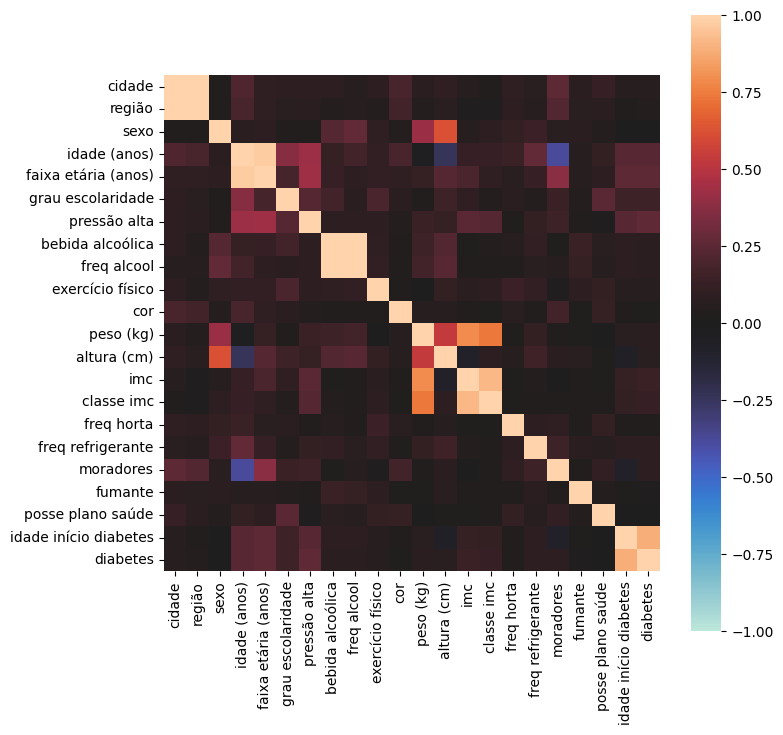

In [ ]:
# complete_correlation = associations(df, filename= 'complete_correlation.png', 
#                                     figsize=(8,8),
#                                     annot=False)

df_corr = df[['cidade',
             'região',
             'sexo',
             'idade (anos)',
             'faixa etária (anos)',
             'grau escolaridade',
             'pressão alta',
             'bebida alcoólica',
             'freq alcool',
             'exercício físico',
             'cor',
             'peso (kg)',
             'altura (cm)',
             'imc',
             'classe imc',
             'freq horta',
             'freq refrigerante',
             'moradores',
             'fumante',
             'posse plano saúde',
             'idade início diabetes',
             'diabetes',             
             ]]

correlation = associations(df_corr, filename= 'correlation.png', 
                                    figsize=(8,8),
                                    annot=False)

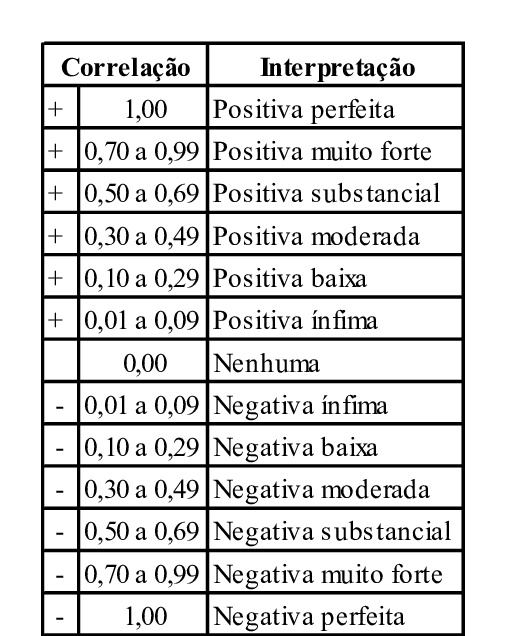

In [ ]:
from IPython.display import Image, display

display(Image(filename='drive/My Drive/databetes/assets/caique/Quadro-8-Interpretacao-das-escalas-de-coeficientes-de-correlacao.png',
              width=300))

## Decision Tree Classifier

In [ ]:
# https://datagy.io/sklearn-decision-tree-classifier/
df

,chave,replica,ano,cidade,região,sexo,idade (anos),faixa etária (anos),grau escolaridade,pressão alta,bebida alcoólica,freq alcool,exercício físico,cor,peso (kg),altura (cm),imc,classe imc,freq horta,freq refrigerante,moradores,fumante,posse plano saúde,idade início diabetes,diabetes
0,1,1,2015,Aracajú,Nordeste,masculino,59,55 a 64,1º grau ou fundamental ou supletivo de 1º grau,não,não,NaN,não,branca,76.0,172.0,25.7,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,3,não,não,NaN,não
1,2,1,2015,Aracajú,Nordeste,feminino,20,18 a 24,2º grau ou colégio ou técnico ou normal ou cie...,sim,não,NaN,não,parda,84.0,162.0,32.0,obesidade classe I,5 a 6 dias por semana,1 a 2 dias por semana,7,não,não,NaN,não
2,4,1,2015,Aracajú,Nordeste,feminino,32,25 a 34,"pós-graduação (especialização, mestrado, douto...",não,não,NaN,sim,preta,45.0,160.0,17.6,baixo peso,3 a 4 dias por semana,quase nunca,2,não,"sim, apenas um",NaN,não
3,5,1,2015,Aracajú,Nordeste,feminino,70,65+,2º grau ou colégio ou técnico ou normal ou cie...,sim,sim,1 a 2 dias por semana,sim,parda,62.0,153.0,26.5,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,2,não,"sim, apenas um",NaN,não
4,7,1,2015,Curitiba,Sul,feminino,84,65+,curso primário,sim,não,NaN,não,branca,51.0,140.0,26.0,sobrepeso,todos os dias (inclusive sábado e domingo),nunca,1,não,"sim, apenas um",84.0,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235425,72213241096,33,2021,São Paulo,Sudeste,feminino,72,65+,3º grau ou curso superior,não,não,NaN,não,parda,44.0,153.0,18.8,adequado ou eutrófico,quase nunca,nunca,2,não,não,NaN,não
235426,45314403046,26,2021,Belo Horizonte,Sudeste,feminino,67,65+,"pós-graduação (especialização, mestrado, douto...",sim,sim,1 a 2 dias por semana,não,parda,64.0,156.0,26.3,sobrepeso,todos os dias (inclusive sábado e domingo),quase nunca,6,não,"sim, mais de um",NaN,não
235427,26374242025,4,2021,Vitória,Sudeste,feminino,75,65+,3º grau ou curso superior,não,sim,menos de 1 dia por semana,não,parda,60.0,147.0,27.8,sobrepeso,todos os dias (inclusive sábado e domingo),quase nunca,4,não,"sim, apenas um",NaN,não
235428,22312495026,36,2021,Porto Alegre,Sul,feminino,77,65+,"pós-graduação (especialização, mestrado, douto...",sim,não,NaN,não,preta,58.0,162.0,22.1,adequado ou eutrófico,todos os dias (inclusive sábado e domingo),nunca,1,não,não,NaN,não


In [ ]:
df['diabetes'] = df['diabetes'].replace('sim', 1)
df['diabetes'] = df['diabetes'].replace('não', 0)

# Convert categorical columns into one-hot encoding
df_encoded = pd.get_dummies(df)
print(df_encoded.columns.tolist())

['chave', 'replica', 'ano', 'idade (anos)', 'peso (kg)', 'altura (cm)', 'imc', 'moradores', 'idade início diabetes', 'diabetes', 'cidade_Aracajú', 'cidade_Belo Horizonte', 'cidade_Belém', 'cidade_Boa Vista', 'cidade_Campo Grande', 'cidade_Cuibá', 'cidade_Curitiba', 'cidade_Distrito Federal', 'cidade_Florianópolis', 'cidade_Fortaleza', 'cidade_Goiânia', 'cidade_João Pessoa', 'cidade_Macapá', 'cidade_Maceió', 'cidade_Manaus', 'cidade_Natal', 'cidade_Palmas', 'cidade_Porto Alegre', 'cidade_Porto Velho', 'cidade_Recife', 'cidade_Rio Branco', 'cidade_Rio de Janeiro', 'cidade_Salvador', 'cidade_São Luís', 'cidade_São Paulo', 'cidade_Teresina', 'cidade_Vitória', 'região_Centro-Oeste', 'região_Nordeste', 'região_Norte', 'região_Sudeste', 'região_Sul', 'sexo_feminino', 'sexo_masculino', 'faixa etária (anos)_18 a 24', 'faixa etária (anos)_25 a 34', 'faixa etária (anos)_35 a 44', 'faixa etária (anos)_45 a 54', 'faixa etária (anos)_55 a 64', 'faixa etária (anos)_65+', 'grau escolaridade_1º grau ou

In [ ]:
# column_labels = df.columns.tolist()
# print(column_labels)

# elements_to_remove = ['chave', 'replica', 'cidade', 'região', 'ano', 'diabetes']
# X = [x for x in column_labels if x not in elements_to_remove]

feature_names = ['idade (anos)',
     'grau escolaridade_1º grau ou fundamental ou supletivo de 1º grau',
     'grau escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau',
     'grau escolaridade_3º grau ou curso superior',
     'grau escolaridade_admissão',
     'grau escolaridade_curso ginasial ou ginásio',
     'grau escolaridade_curso primário',
     'grau escolaridade_nunca estudou',
     'grau escolaridade_pós-graduação (especialização, mestrado, doutorado)',
     'pressão alta_sim',
     'pressão alta_não',
     'imc',
     ]

print(feature_names)

['idade (anos)', 'grau escolaridade_1º grau ou fundamental ou supletivo de 1º grau', 'grau escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau', 'grau escolaridade_3º grau ou curso superior', 'grau escolaridade_admissão', 'grau escolaridade_curso ginasial ou ginásio', 'grau escolaridade_curso primário', 'grau escolaridade_nunca estudou', 'grau escolaridade_pós-graduação (especialização, mestrado, doutorado)', 'pressão alta_sim', 'pressão alta_não', 'imc']


In [ ]:
X = df_encoded[feature_names] # Features
y = df_encoded.diabetes # Target variable

In [ ]:
var = 'diabetes'
print("VARIÁVEL :", var)
print("NÃO há valores duplicados :",df_encoded[var].is_unique)
print("qtde de unique values :", df_encoded[var].nunique())
print("unique values de",var,":",np.sort(df_encoded[var].unique())[:])
print("qtde de '1' :", np.count_nonzero(df_encoded[var] == 1))
print("qtde de '0' :", np.count_nonzero(df_encoded[var] == 2))
print(25*"----")

VARIÁVEL : diabetes
NÃO há valores duplicados : False
qtde de unique values : 2
unique values de diabetes : [0 1]
qtde de '1' : 22998
qtde de '0' : 0
----------------------------------------------------------------------------------------------------


In [ ]:
'''
Synthetic Minority Over-sampling Technique (SMOTE): O SMOTE é uma técnica que 
cria novos exemplos sintéticos da classe minoritária, combinando os recursos dos 
exemplos existentes.
'''

from imblearn.over_sampling import SMOTE

# Criar o objeto SMOTE
smote = SMOTE()

# Aplicar o SMOTE aos dados
X, y = smote.fit_resample(X, y)

In [ ]:
# Count NaN values in multiple columns of DataFrame
nan_count = X.isna().sum()
print(nan_count)
print(X.shape)

idade (anos)                                                                                                                  0
grau escolaridade_1º grau ou fundamental ou supletivo de 1º grau                                                              0
grau escolaridade_2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau    0
grau escolaridade_3º grau ou curso superior                                                                                   0
grau escolaridade_admissão                                                                                                    0
grau escolaridade_curso ginasial ou ginásio                                                                                   0
grau escolaridade_curso primário                                                                                              0
grau escolaridade_nunca estudou                                                                         

In [ ]:
X = X.dropna() # drop rows with NaN values

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
'''
Hyperparameter Tuning – `Cross-Validation`
'''

# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    # 'max_depth':  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    # 'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'splitter': 'best'}


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, 
                             criterion='entropy', 
                             max_features=None, 
                             splitter='best')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

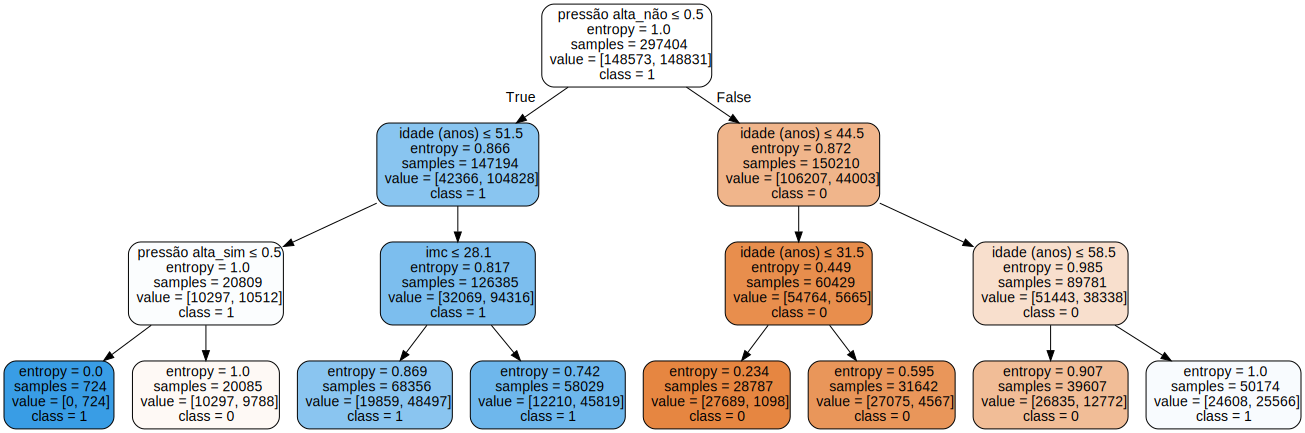

In [ ]:
from sklearn import tree

# Export the decision tree as a DOT file
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=['0','1'], filled=True, rounded=True, special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
# graph.render("decision_tree")  # Save the visualization as a file (optional)
graph.view()  # Open a viewer to display the decision tree

graph  # Open a viewer to display the decision tree

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score

def print_classification_report(y, y_pred):
    val_accuracy = accuracy_score(y, y_pred)
    val_balanced_accuracy = balanced_accuracy_score(y, y_pred)
    print("Acurácia no teste: {:.2f}%".format(val_accuracy * 100))
    print("Acurácia balanceada no teste: {:.2f}%".format(val_balanced_accuracy * 100))
    print("")

    # Gerando o relatório com diversas métricas
    report = classification_report(y, y_pred)

    # Exibindo o relatório
    print(report)
    
    # Plotando a matriz de confusão
    matriz_confusão = confusion_matrix(y, y_pred)
    plt.figure(figsize = (3,3))
    sns.heatmap(matriz_confusão, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    plt.close()

Acurácia no teste: 71.33%
Acurácia balanceada no teste: 71.35%

              precision    recall  f1-score   support

           0       0.77      0.62      0.68     63859
           1       0.68      0.81      0.74     63601

    accuracy                           0.71    127460
   macro avg       0.72      0.71      0.71    127460
weighted avg       0.72      0.71      0.71    127460



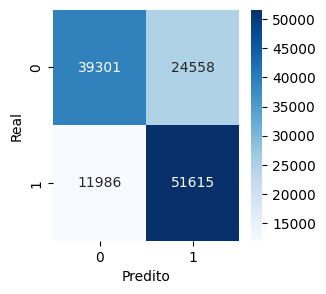

In [ ]:
# Model Accuracy, how often is the classifier correct?

print_classification_report(y_test, y_pred)